In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from robustRandomForest import RobustRandomForest
from sklearn.ensemble import RandomForestRegressor
from distribution import Distribution

# Экспериментальные данные

In [13]:
dist = Distribution(_func=lambda x: x * np.sin(x), ro1=0.1, ro2=1.0, alpha=0.95)
X_train, X_test, Y_train, Y_test = dist.distribution([-6, 6], 500)
print(dist.sigma1)

0.049234080497171255


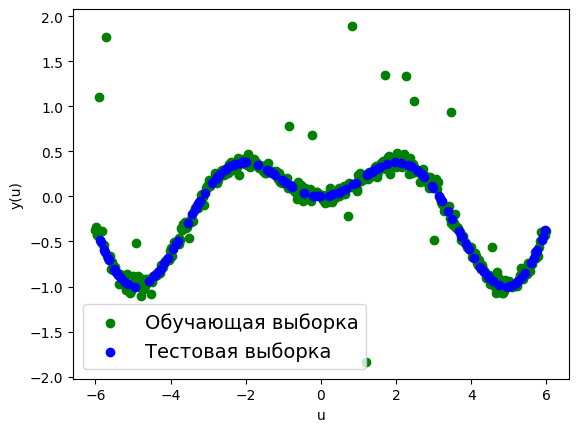

In [14]:
#plt.title(f'Тренировочные и тестовые данные')
plt.scatter(X_train, Y_train, color='g', label='Обучающая выборка')
plt.scatter(X_test, Y_test, color='b', label='Тестовая выборка')
plt.legend(fontsize=14)
plt.xlabel('u')
plt.ylabel('y(u)')
plt.savefig('Plots/train_test.png')
plt.show()


## Случайный лес из sklearn

In [15]:
sk_rf = RandomForestRegressor(n_jobs=-1)
sk_rf.fit(X_train, Y_train)
sk_rf_pred = sk_rf.predict(X_test)
print(f'MAE sk_rf: {mean_absolute_error(sk_rf_pred, Y_test)}')
print(f'MSE sk_rf: {mean_squared_error(sk_rf_pred, Y_test)}')

MAE sk_rf: 0.09731510302066763
MSE sk_rf: 0.06253666912933088


## Кастомный случайный лес

In [16]:
rrf = RobustRandomForest(n_jobs=-1, regression=True)
rrf.fit(X_train, Y_train)
rrf_pred = rrf.predict(X_test)
print(f'MAE rrf: {mean_absolute_error(rrf_pred, Y_test)}')
print(f'MSE rrf: {mean_squared_error(rrf_pred, Y_test)}')

MAE rrf: 0.10372858896361152
MSE rrf: 0.07601273926874587


## Случайный лес с потерями Хубера

In [17]:
huber_rrf = RobustRandomForest(n_jobs=-1, regression=True, robustness='huber', delta=0.0001)
huber_rrf.fit(X_train, Y_train)
huber_rrf_pred = huber_rrf.predict(X_test)

print(f'MAE huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')
print(f'MSE huber_rrf: {mean_squared_error(huber_rrf_pred, Y_test)}')

MAE huber_rrf: 0.09601629087917227
MSE huber_rrf: 0.03637600585254165


## Случайный лес с потерями Тьюки

In [18]:
tukey_rrf = RobustRandomForest(n_jobs=-1, regression=True, robustness='tukey', delta=0.0001)
tukey_rrf.fit(X_train, Y_train)
tukey_rrf_pred = tukey_rrf.predict(X_test)

print(f'MAE tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')
print(f'MSE tukey_rrf: {mean_squared_error(tukey_rrf_pred, Y_test)}')

MAE tukey_rrf: 0.10372796234232542
MSE tukey_rrf: 0.07601270600642038


## Случайный лес lowess

In [19]:
lowess_rrf = RobustRandomForest(n_jobs=-1, regression=True, robustness='lowess')
lowess_rrf.fit(X_train, Y_train, alpha=20)
lowess_rrf_pred = lowess_rrf.predict(X_test)

print(f'MAE lowess_rrf: {mean_absolute_error(lowess_rrf_pred, Y_test)}')
print(f'MSE lowess_rrf: {mean_squared_error(lowess_rrf_pred, Y_test)}')

MAE lowess_rrf: 0.10071220735262272
MSE lowess_rrf: 0.06434863468830795


# Результаты случайного леса с потерями Хубера при разных значениях delta

In [20]:
rrf = RobustRandomForest(n_jobs=-1, regression = True, robustness='huber')
rrf.fit(X_train, Y_train)

rrf.delta=0.0001
huber_rrf_pred_1 = rrf.predict(X_test)

rrf.delta = 0.001
huber_rrf_pred_2 = rrf.predict(X_test)

rrf.delta = 0.01
huber_rrf_pred_3 = rrf.predict(X_test)

rrf.delta = 0.1
huber_rrf_pred_4 = rrf.predict(X_test)

rrf.delta = 1
huber_rrf_pred_5 = rrf.predict(X_test)

rrf.delta = 10
huber_rrf_pred_6 = rrf.predict(X_test)


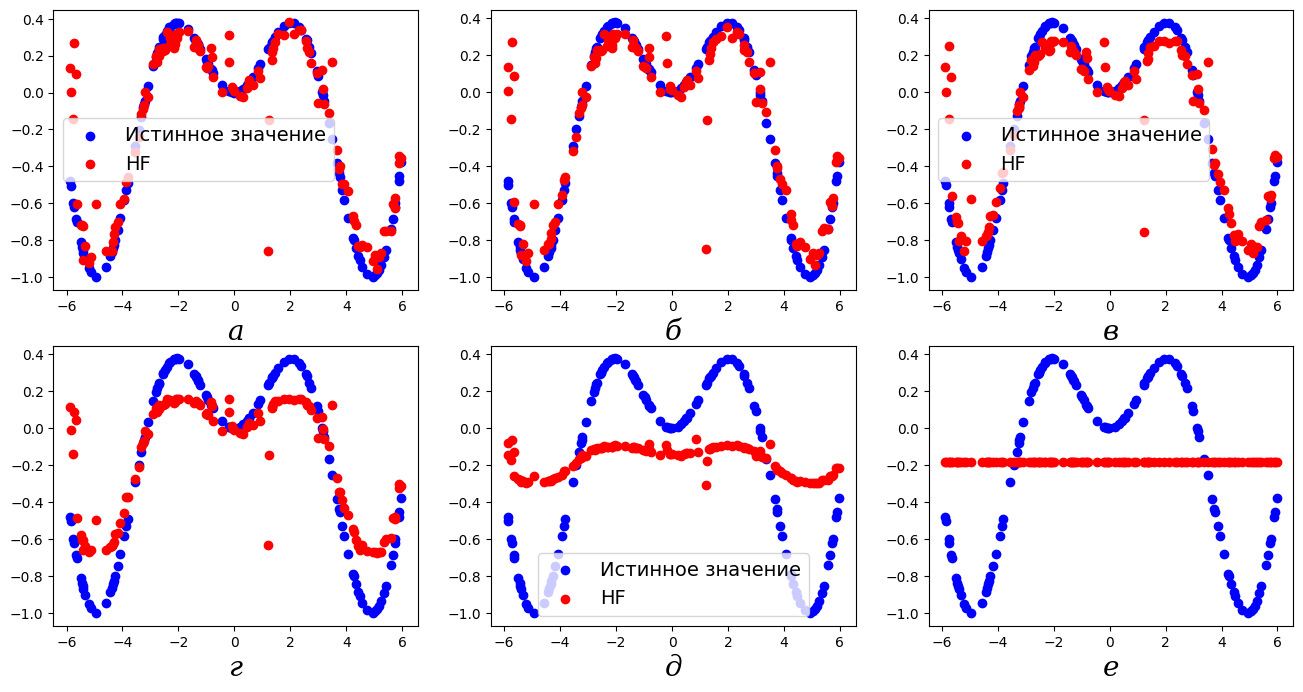

In [22]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
#plt.title('delta = 0.0001')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, huber_rrf_pred_1, color='r', label='HF')
plt.legend(fontsize=14)
plt.xlabel('a', fontsize=20, style='italic', family='serif')
#plt.ylabel('y')

plt.subplot(2, 3, 2)
#plt.title('delta = 0.001')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, huber_rrf_pred_2, color='r', label='HF')
plt.xlabel('б', fontsize=20, style='italic', family='serif')

plt.subplot(2, 3, 3)
#plt.title('delta = 0.01')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, huber_rrf_pred_3, color='r', label='HF')
plt.legend(fontsize=14)
plt.xlabel('в', fontsize=20, style='italic', family='serif')

plt.subplot(2, 3, 4)
#plt.title('delta = 0.1')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, huber_rrf_pred_4, color='r', label='HF')
plt.xlabel('г', fontsize=20, style='italic', family='serif')

plt.subplot(2, 3, 5)
#plt.title('delta = 1')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, huber_rrf_pred_5, color='r', label='HF')
plt.legend(fontsize=14)
plt.xlabel('д', fontsize=20, style='italic', family='serif')

plt.subplot(2, 3, 6)
#plt.title('delta = 10')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, huber_rrf_pred_6, color='r', label='HF')
plt.savefig('Plots/huber_range.png')
plt.xlabel('е', fontsize=20, style='italic', family='serif')
plt.show()

# Результаты случайного леса с потерями Хубера при разных значениях delta

In [58]:
rrf.robustness='tukey'

rrf.delta=0.0001
tukey_rrf_pred_1 = rrf.predict(X_test)

rrf.delta = 0.001
tukey_rrf_pred_2 = rrf.predict(X_test)

rrf.delta = 0.01
tukey_rrf_pred_3 = rrf.predict(X_test)

rrf.delta = 0.1
tukey_rrf_pred_4 = rrf.predict(X_test)

rrf.delta = 1
tukey_rrf_pred_5 = rrf.predict(X_test)

rrf.delta = 10
tukey_rrf_pred_6 = rrf.predict(X_test)

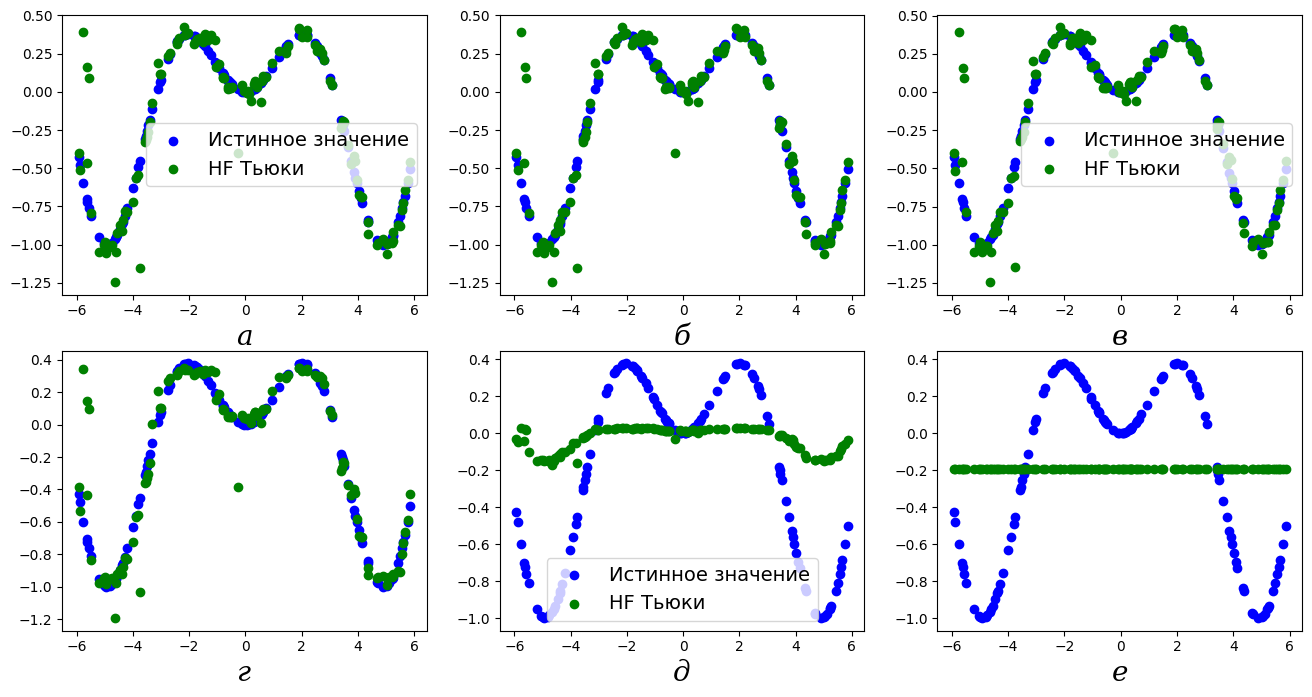

In [59]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
#plt.title('delta = 0.0001')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, tukey_rrf_pred_1, color='g', label='HF Тьюки')
plt.legend(fontsize=14)
plt.xlabel('a', fontsize=20, style='italic', family='serif')
#plt.ylabel('y')

plt.subplot(2, 3, 2)
#plt.title('delta = 0.001')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, tukey_rrf_pred_2, color='g', label='HF Тьюки')
plt.xlabel('б', fontsize=20, style='italic', family='serif')

plt.subplot(2, 3, 3)
#plt.title('delta = 0.01')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, tukey_rrf_pred_3, color='g', label='HF Тьюки')
plt.legend(fontsize=14)
plt.xlabel('в', fontsize=20, style='italic', family='serif')

plt.subplot(2, 3, 4)
#plt.title('delta = 0.1')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, tukey_rrf_pred_4, color='g', label='HF Тьюки')
plt.xlabel('г', fontsize=20, style='italic', family='serif')

plt.subplot(2, 3, 5)
#plt.title('delta = 1')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, tukey_rrf_pred_5, color='g', label='HF Тьюки')
plt.legend(fontsize=14)
plt.xlabel('д', fontsize=20, style='italic', family='serif')

plt.subplot(2, 3, 6)
#plt.title('delta = 10')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, tukey_rrf_pred_6, color='g', label='HF Тьюки')
plt.xlabel('е', fontsize=20, style='italic', family='serif')
plt.savefig('Plots/tukey_range.png')
plt.show()

# Результаты случайного леса lowess при разных значениях alpha

In [60]:
rrf.robustness='lowess'

rrf.fit(X_train, Y_train, alpha=20)
lowess_rrf_pred_1 = rrf.predict(X_test)

rrf.fit(X_train, Y_train, alpha=6)
lowess_rrf_pred_2 = rrf.predict(X_test)

rrf.fit(X_train, Y_train, alpha=1)
lowess_rrf_pred_3 = rrf.predict(X_test)

rrf.fit(X_train, Y_train, alpha=0.1)
lowess_rrf_pred_4 = rrf.predict(X_test)

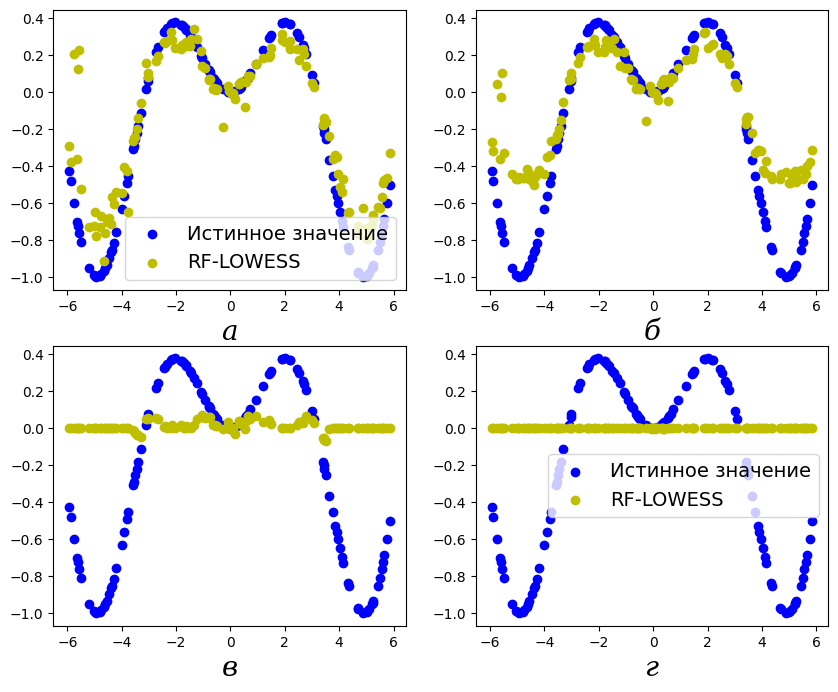

In [61]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
#plt.title('alpha = 20')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, lowess_rrf_pred_1, color='y', label='RF-LOWESS')
plt.legend(fontsize=14)
plt.xlabel('a', fontsize=20, style='italic', family='serif')
#plt.ylabel('y')

plt.subplot(2, 2, 2)
#plt.title('alpha = 6')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, lowess_rrf_pred_2, color='y', label='RF-LOWESS')
plt.xlabel('б', fontsize=20, style='italic', family='serif')

plt.subplot(2, 2, 3)
#plt.title('alpha = 1')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, lowess_rrf_pred_3, color='y', label='RF-LOWESS')
plt.xlabel('в', fontsize=20, style='italic', family='serif')

plt.subplot(2, 2, 4)
#plt.title('alpha = 0.1')
plt.scatter(X_test, Y_test, color='b', label='Истинное значение')
plt.scatter(X_test, lowess_rrf_pred_4, color='y', label='RF-LOWESS')
plt.legend(fontsize=14)
plt.xlabel('г', fontsize=20, style='italic', family='serif')
plt.savefig('Plots/lowess_range.png')
plt.show()